In [1]:
import networkx as nx
import EoN as EoN
import matplotlib.pyplot as plt
from collections import defaultdict
import random

random.seed(3)

sequence = nx.random_powerlaw_tree_sequence(10000, tries=1000000)
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')
t,S,E,I,R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

In [2]:
def percent_superspreaders(sim, G):
    T = sim.transmission_tree()
    G_num_edges = []
    potential_superspreaders = []
    for i in range(G.number_of_nodes()):
        G_num_edges.append((i, G.degree(i)))
        if (G.degree(i)>5):
            potential_superspreaders.append((i, G.degree(i)))
    G_num_edges.sort(key=lambda x:x[1])
    potential_superspreaders.sort(key=lambda x:x[1])
    
    count = 0
    for i in range(len(list(T.out_degree()))):
        if list(T.out_degree())[i][1] > 5:
            count +=1
    return count/len(potential_superspreaders)*100

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

(array([ 1.,  5., 17., 29., 18., 16.,  8.,  6.]),
 array([30.08595989, 31.0530086 , 32.02005731, 32.98710602, 33.95415473,
        34.92120344, 35.88825215, 36.85530086, 37.82234957]),
 <BarContainer object of 8 artists>)

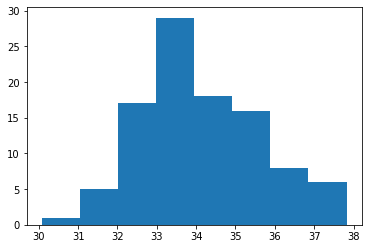

In [3]:
psss = []
for i in range(100):
    sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'), return_full_data = True)
    psss.append(percent_superspreaders(sim, G))
    print(i, end=" ")
plt.hist(psss, 8)

In [6]:
import numpy as np

random.seed(3)

sequence=[1]
while sum(sequence)%2==1:
    sequence = np.random.poisson(1,10000)+1
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')
t,S,E,I,R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

(array([ 8., 27.,  0., 36., 19.,  0.,  6.,  4.]),
 array([ 0.        ,  1.35869565,  2.7173913 ,  4.07608696,  5.43478261,
         6.79347826,  8.15217391,  9.51086957, 10.86956522]),
 <BarContainer object of 8 artists>)

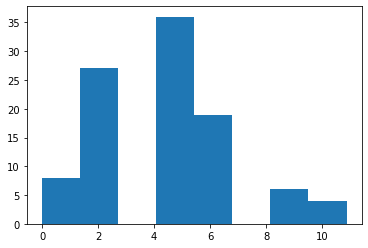

In [7]:
psss = []
for i in range(100):
    sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'), return_full_data = True)
    psss.append(percent_superspreaders(sim, G))
    print(i, end=" ")
plt.hist(psss, 8)